In [1]:
"""
Created on Wed Oct  4 09:40:05 2023

@author: juanvargas
"""

'\nCreated on Wed Oct  4 09:40:05 2023\n\n@author: juanvargas\n'

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer , Normalizer
from sklearn.model_selection import StratifiedKFold, train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression





In [3]:
dt = pd.read_excel('CardiacHypertrophyData_50Samples.xlsx')

dt["Pathologic"] = dt["Pathologic?"].astype("category")

In [68]:
print(dt.columns)

print(dt.describe())

for column in dt.select_dtypes(include=['object']):
    print(f"Frequency for {column}:\n{dt2[column].value_counts()}\n")

print(dt[column].value_counts(normalize=True) * 100)

Index(['Age', 'Sex', 'Racial group', 'Ejection fraction', 'Heart rate (bpm)',
       'Systolic blood pressure', 'Pathologic?', 'Pathologic'],
      dtype='object')
             Age  Ejection fraction  Heart rate (bpm)   
count  50.000000          50.000000         50.000000  \
mean   57.058304           0.641076         85.582296   
std     6.700671           0.071886         18.557095   
min    45.684119           0.512099         51.666039   
25%    51.401860           0.603342         72.778414   
50%    58.485317           0.638370         84.254215   
75%    61.384328           0.667212         96.481678   
max    69.492794           0.897709        145.233566   

       Systolic blood pressure  Pathologic?  
count                50.000000    50.000000  
mean                108.722090     0.200000  
std                  10.304580     0.404061  
min                  86.450279     0.000000  
25%                  99.663973     0.000000  
50%                 108.462963     0.000000  


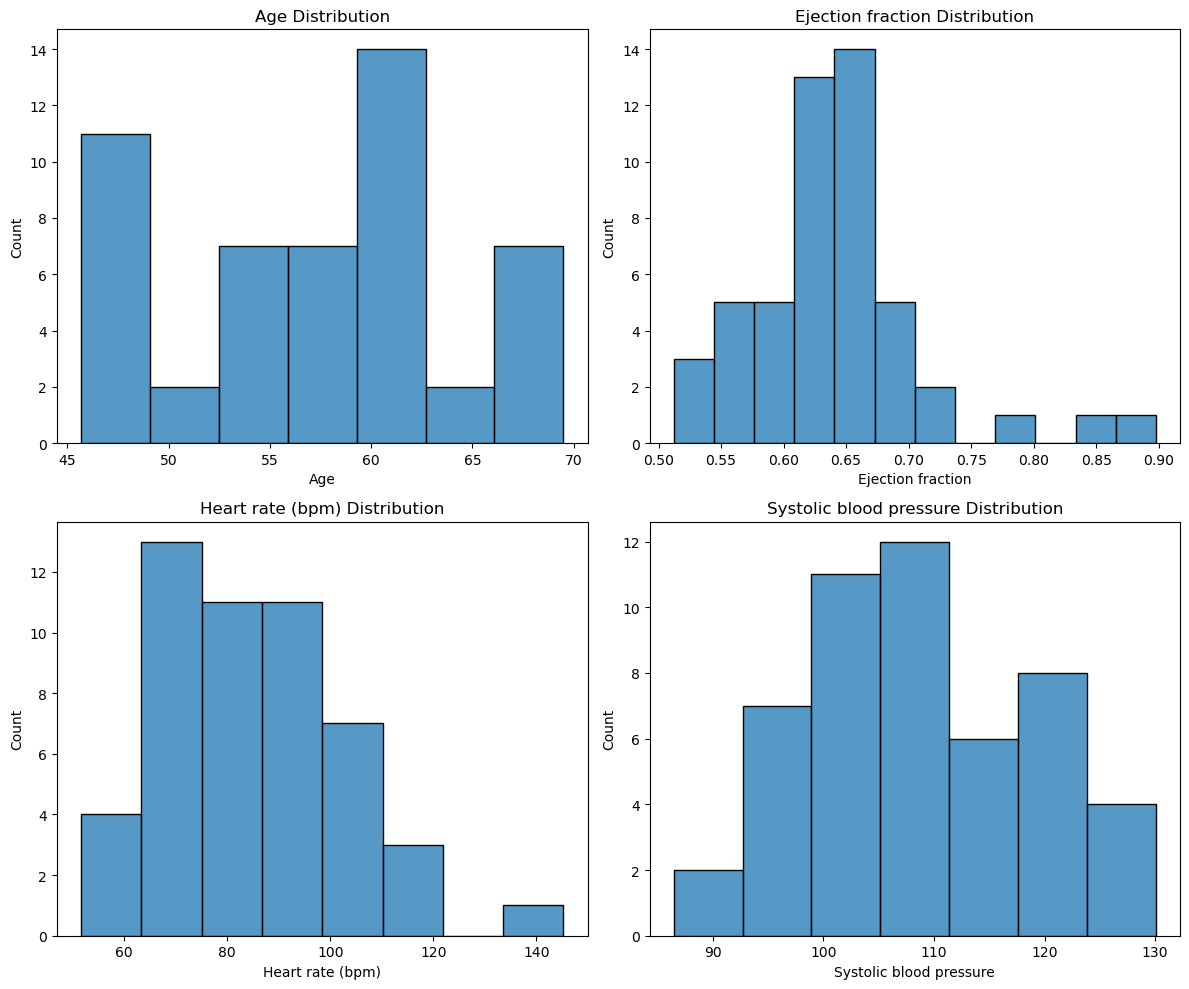

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot data on each subplot

# 1st subplot: Age
sns.histplot(dt, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2nd subplot: Ejection fraction
sns.histplot(dt, x='Ejection fraction', ax=axes[0, 1])
axes[0, 1].set_title('Ejection fraction Distribution')

# 3rd subplot: Heart rate (bpm)
sns.histplot(dt, x='Heart rate (bpm)', ax=axes[1, 0])
axes[1, 0].set_title('Heart rate (bpm) Distribution')

# 4th subplot: Systolic blood pressure
sns.histplot(dt, x='Systolic blood pressure', ax=axes[1, 1])
axes[1, 1].set_title('Systolic blood pressure Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()

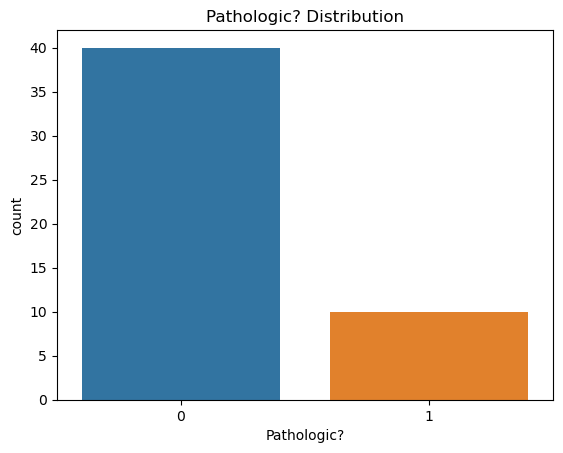

In [9]:
sns.countplot(data=dt, x='Pathologic?')
plt.title('Pathologic? Distribution')
plt.show()

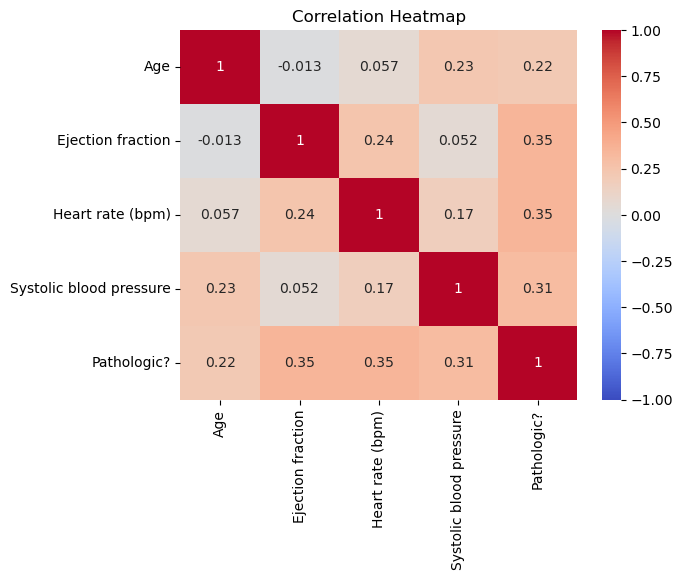

In [7]:
numeric_cols = dt.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Testing some normalizations and std scalers and combinations. Also box-cox and such

In [8]:
numeric_data = dt[['Age', 'Ejection fraction', 'Heart rate (bpm)', 'Systolic blood pressure']]

# 1. Log Transformation
log_transformed = np.log(numeric_data + 1)  # Adding 1 to handle zero values

# 2. Standard Scaling
scaler = StandardScaler()
std_scaled = scaler.fit_transform(numeric_data)
std_scaled_df = pd.DataFrame(std_scaled, columns=numeric_data.columns)

# 3. Power Transform
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformed = power_transformer.fit_transform(numeric_data)
power_transformed_df = pd.DataFrame(power_transformed, columns=numeric_data.columns)

# 4. Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed = quantile_transformer.fit_transform(numeric_data)
quantile_transformed_df = pd.DataFrame(quantile_transformed, columns=numeric_data.columns)




c:\Users\Juan\anaconda3\envs\stlearn\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn(


Vizualize

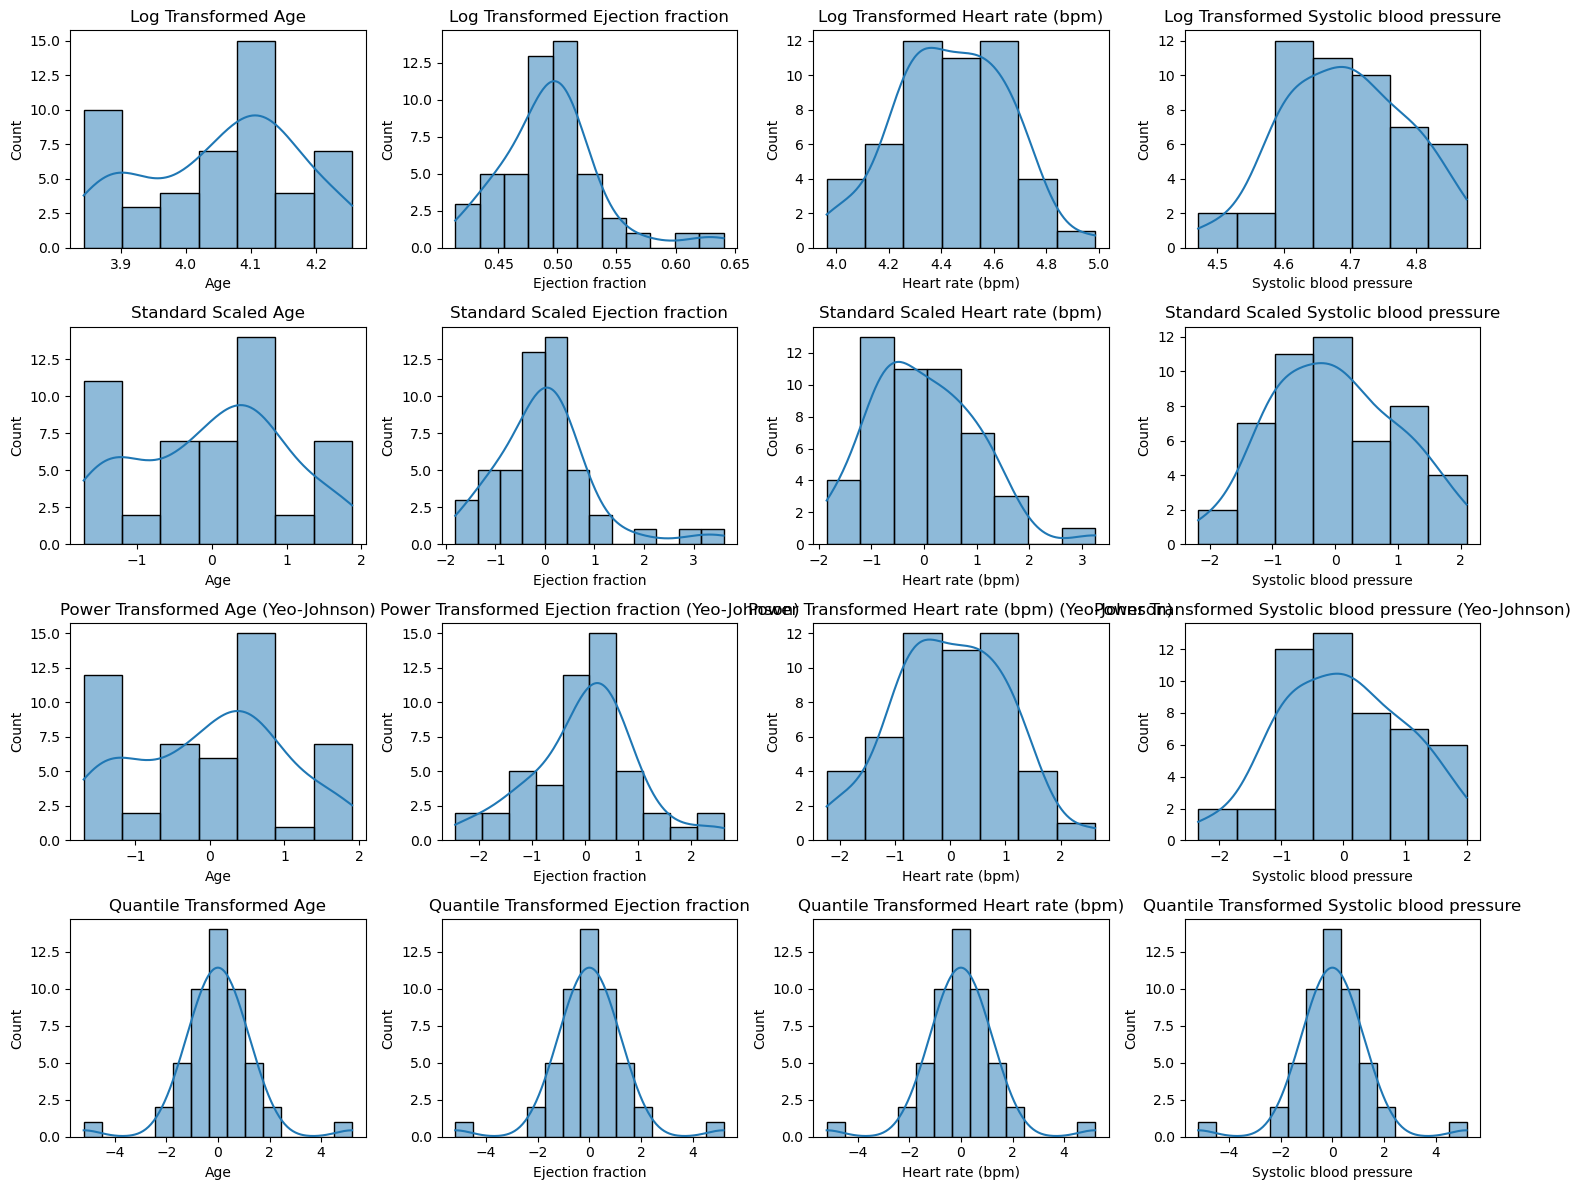

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the numeric data
num_cols = len(numeric_data.columns)

# Create a grid of subplots with a row for each transformation and a column for each feature
fig, axes = plt.subplots(nrows=4, ncols=num_cols, figsize=(15, 12))

# 1. Log Transformation
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(log_transformed[col], ax=axes[0, idx], kde=True)
    axes[0, idx].set_title(f'Log Transformed {col}')

# 2. Standard Scaling
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(std_scaled_df[col], ax=axes[1, idx], kde=True)
    axes[1, idx].set_title(f'Standard Scaled {col}')

# 3. Power Transformation
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(power_transformed_df[col], ax=axes[2, idx], kde=True)
    axes[2, idx].set_title(f'Power Transformed {col} (Yeo-Johnson)')

# 4. Quantile Transformation
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(quantile_transformed_df[col], ax=axes[3, idx], kde=True)
    axes[3, idx].set_title(f'Quantile Transformed {col}')

# Adjust the layout
plt.tight_layout()
plt.show()



In [9]:
# 1. Box-Cox Transformation
boxcox_transformer = PowerTransformer(method='box-cox')
boxcox_transformed = boxcox_transformer.fit_transform(numeric_data)
boxcox_transformed_df = pd.DataFrame(boxcox_transformed, columns=numeric_data.columns)

# 2. L1 Normalization
l1_normalizer = Normalizer(norm='l1')
l1_normalized = l1_normalizer.fit_transform(numeric_data)
l1_normalized_df = pd.DataFrame(l1_normalized, columns=numeric_data.columns)

# 3. L2 Normalization
l2_normalizer = Normalizer(norm='l2')
l2_normalized = l2_normalizer.fit_transform(numeric_data)
l2_normalized_df = pd.DataFrame(l2_normalized, columns=numeric_data.columns)

# 4. Max Normalization
max_normalizer = Normalizer(norm='max')
max_normalized = max_normalizer.fit_transform(numeric_data)
max_normalized_df = pd.DataFrame(max_normalized, columns=numeric_data.columns)


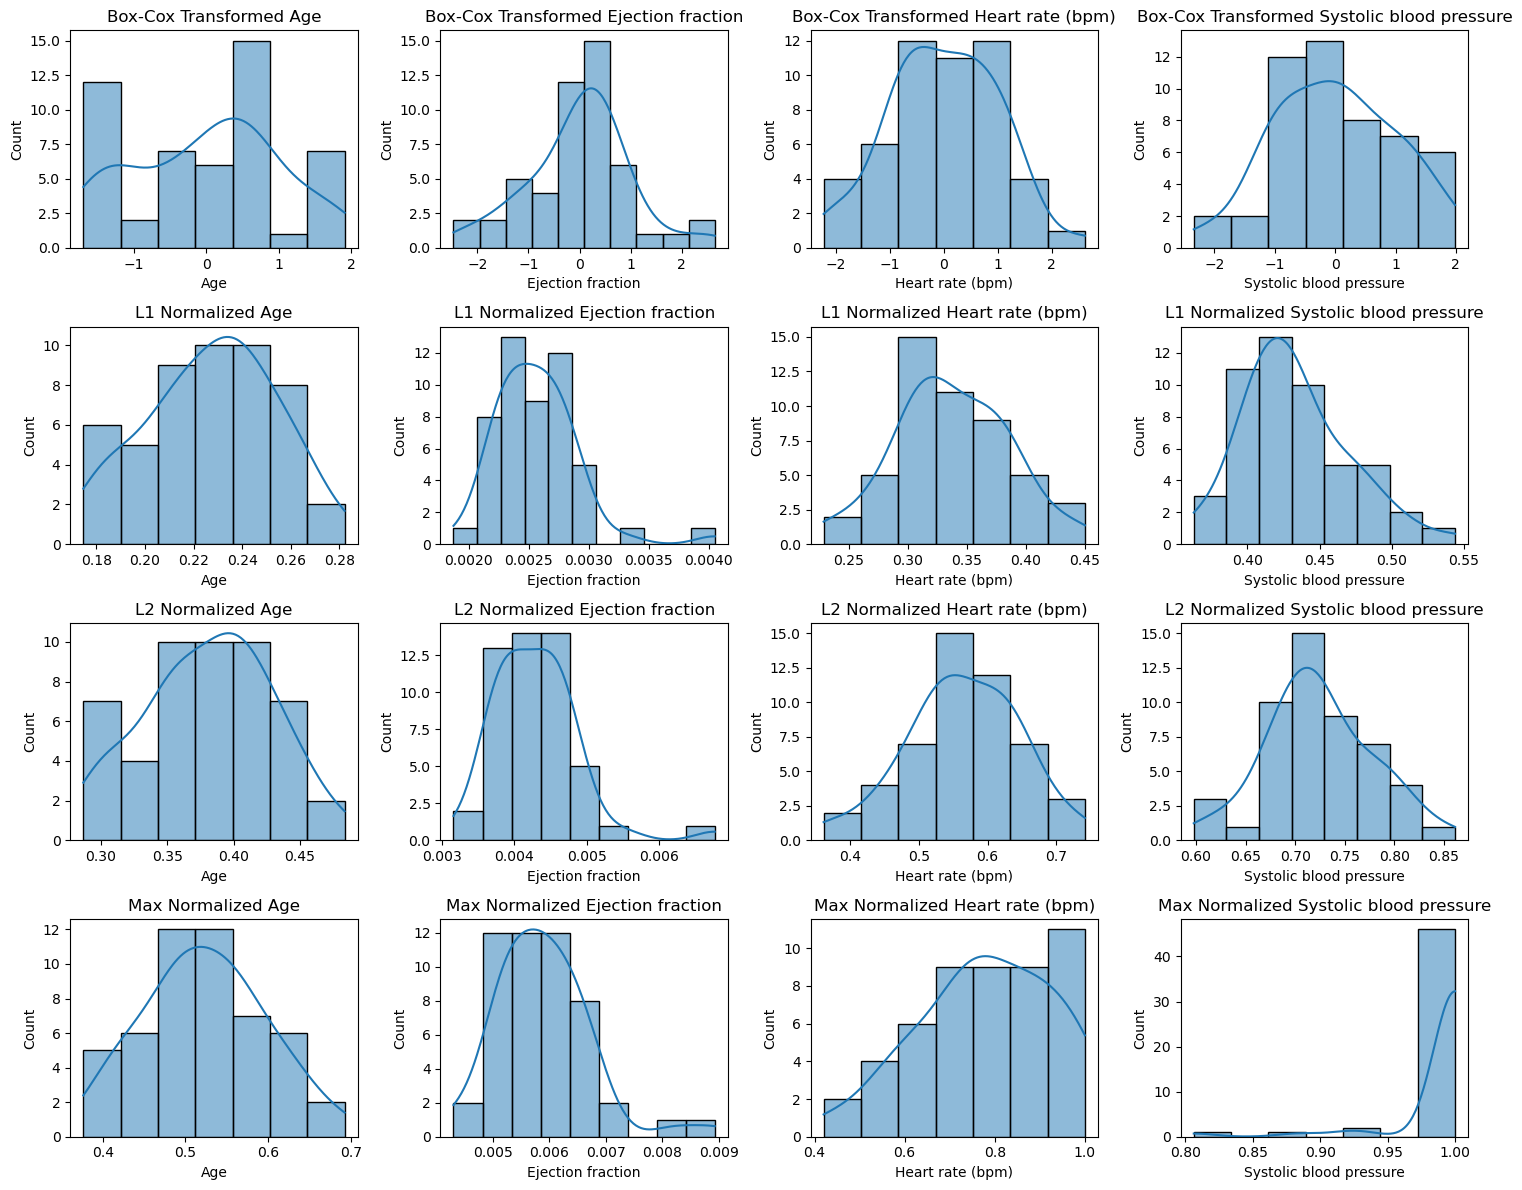

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the numeric data
num_cols = len(numeric_data.columns)

# Create a grid of subplots with a row for each transformation and a column for each feature
fig, axes = plt.subplots(nrows=4, ncols=num_cols, figsize=(15, 12))

# 1. Box-Cox Transformation
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(boxcox_transformed_df[col], ax=axes[0, idx], kde=True)
    axes[0, idx].set_title(f'Box-Cox Transformed {col}')

# 2. L1 Normalization
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(l1_normalized_df[col], ax=axes[1, idx], kde=True)
    axes[1, idx].set_title(f'L1 Normalized {col}')

# 3. L2 Normalization
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(l2_normalized_df[col], ax=axes[2, idx], kde=True)
    axes[2, idx].set_title(f'L2 Normalized {col}')

# 4. Max Normalization
for idx, col in enumerate(numeric_data.columns):
    sns.histplot(max_normalized_df[col], ax=axes[3, idx], kde=True)
    axes[3, idx].set_title(f'Max Normalized {col}')

# Adjust the layout
plt.tight_layout()
plt.show()


In [22]:
print(dt.Pathologic.ravel())
print(dt.Pathologic.values)

[0, 0, 1, 0, 1, ..., 0, 1, 0, 0, 0]
Length: 50
Categories (2, int64): [0, 1]
[0, 0, 1, 0, 1, ..., 0, 1, 0, 0, 0]
Length: 50
Categories (2, int64): [0, 1]


Model implementation

In [10]:
#  The optimized parameters are obtained by gradient descent since there is no closed form version of it. The derivative of the log loss function looks like the normal equation one.


# Select the categorical columns from the original 'dt' DataFrame
categorical_data = dt[['Sex', 'Racial group', 'Pathologic?', 'Pathologic']]

# Combine the standardized numerical data with the categorical data
combined_df = pd.concat([std_scaled_df, categorical_data.reset_index(drop=True)], axis=1)

combined_df["Sex"] = dt["Sex"].astype("category")

# One-hot encoding the categorical columns, for categoricl data YOU MUST DO ONE HOT YOURSELF. Model will not do automatically
combined_df_encoded = pd.get_dummies(combined_df, columns=['Sex', 'Racial group'])

print(combined_df_encoded.columns)
mod = LogisticRegression()


X = combined_df_encoded[['Age', 'Ejection fraction', 'Heart rate (bpm)', 
                         'Systolic blood pressure', 'Sex_Female', 'Sex_Male', 
                         'Racial group_American Indian or Alaska Native', 'Racial group_Asian', 
                         'Racial group_Black or African American', 'Racial group_Hispanic or Latino', 
                         'Racial group_Native Hawaiian or other Pacific Islander', 'Racial group_White']]


y = combined_df_encoded['Pathologic']

# Create and fit the logistic regression model
mod = LogisticRegression(max_iter=10000)  # Increasing max_iter to ensure convergence for datasets with many features
mod.fit(X, y)




Index(['Age', 'Ejection fraction', 'Heart rate (bpm)',
       'Systolic blood pressure', 'Pathologic?', 'Pathologic', 'Sex_Female',
       'Sex_Male', 'Racial group_American Indian or Alaska Native',
       'Racial group_Asian', 'Racial group_Black or African American',
       'Racial group_Hispanic or Latino',
       'Racial group_Native Hawaiian or other Pacific Islander',
       'Racial group_White'],
      dtype='object')


LogisticRegression(max_iter=10000)

Evaluatuon

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

test_sizes = [ 1/5, 20/50, 30/50, 40/50]

cross_val_results = pd.DataFrame(columns=['test_size','accuracy_mean', 'accuracy_stddev','roc_auc_mean','roc_auc_stddev'])

for ts in test_sizes:
    sss = StratifiedShuffleSplit(n_splits=200, test_size=ts, random_state=0)

    acc = cross_val_score(mod, X, y, cv=sss, scoring='accuracy')
    roc = cross_val_score(mod, X, y, cv=sss, scoring='roc_auc')

    acc_mean, acc_std = acc.mean(), acc.std()
    roc_mean, roc_std = roc.mean(), roc.std()

    new_row = {
        'test_size': ts*50,
        'accuracy_mean': acc_mean,
        'accuracy_stddev': acc_std,
        'roc_auc_mean': roc_mean,
        'roc_auc_stddev': roc_std
    }

    cross_val_results = pd.concat([cross_val_results, pd.DataFrame([new_row])], ignore_index=True)



In [58]:
cross_val_results

,test_size,accuracy_mean,accuracy_stddev,roc_auc_mean,roc_auc_stddev
0,10.0,0.838000,0.081584,0.707812,0.210926
1,20.0,0.838250,0.053145,0.727344,0.122272
2,30.0,0.819667,0.038179,0.691319,0.108308
3,40.0,0.817000,0.025588,0.645801,0.109594


In [54]:
k_folds = 5  
test_sizes = [0.10, 0.20, 0.30, 0.40]
results = []


skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for test_size in test_sizes:
    
    X_train_main, X_test, y_train_main, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    fold_accuracies = []
    fold_roc_aucs = []
    
    # K-Fold Cross Validation
    for train_index, val_index in skf.split(X_train_main, y_train_main):
        X_train, X_val = X_train_main.iloc[train_index], X_train_main.iloc[val_index]
        y_train, y_val = y_train_main.iloc[train_index], y_train_main.iloc[val_index]
        
     
        model = LogisticRegression(max_iter=10000)
        model.fit(X_train, y_train)
        
        # Model Evaluation on Validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probability estimates of the positive class
        fold_accuracies.append(accuracy_score(y_val, y_val_pred))
        fold_roc_aucs.append(roc_auc_score(y_val, y_val_prob))
    
    # Average Performance Metrics across all folds
    avg_accuracy = sum(fold_accuracies) / k_folds
    avg_roc_auc = sum(fold_roc_aucs) / k_folds
    
    # Evaluation on Test Set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    
    results.append({
        'Test Size (%)': test_size * 100,
        'CV Accuracy': avg_accuracy,
        'CV ROC AUC': avg_roc_auc,
        'Test Accuracy': test_accuracy,
        'Test ROC AUC': test_roc_auc
    })


results_df = pd.DataFrame(results)
print(results_df)


   Test Size (%)  CV Accuracy  CV ROC AUC  Test Accuracy  Test ROC AUC
0           10.0     0.844444    0.742857            0.6      0.500000
1           20.0     0.875000    0.630952            0.8      0.312500
2           30.0     0.857143    0.766667            0.8      0.555556
3           40.0     0.833333    0.715000            0.8      0.375000


LOOCV

In [64]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

model = LogisticRegression(max_iter=10000)


loo = LeaveOneOut()

# Store predicted probabilities, predicted labels, and true labels
y_true_loo = []
y_pred_loo = []  
y_prob_loo = []


for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    # Get the probability for the positive class
    prob = model.predict_proba(X_test)[:, 1]
    pred = model.predict(X_test)
    
    y_true_loo.append(y_test.values[0])
    y_pred_loo.append(pred[0])
    y_prob_loo.append(prob[0])


y_true_loo = np.array(y_true_loo)
y_pred_loo = np.array(y_pred_loo)
y_prob_loo = np.array(y_prob_loo)


roc_auc = roc_auc_score(y_true_loo, y_prob_loo)
accuracy = accuracy_score(y_true_loo, y_pred_loo)

print(f"Overall ROC AUC: {roc_auc:.4f}")
print(f"Overall Accuracy: {accuracy:.4f}")


#This result is only with the test dataset.

Overall ROC AUC: 0.6875
Overall Accuracy: 0.8400


Use the 200 sample one

In [105]:
dt2 = pd.read_excel('CardiacHypertrophyData_200Samples.xlsx')
dt2["Pathologic"] = dt2["Pathologic?"].astype("category")

In [106]:

print(dt2.describe())

for column in dt2.select_dtypes(include=['object']):
    print(f"Frequency for {column}:\n{dt2[column].value_counts()}\n")

print(dt2[column].value_counts(normalize=True) * 100)

              Age  Ejection fraction  Heart rate (bpm)   
count  200.000000         200.000000        200.000000  \
mean    56.932229           0.644767         83.969130   
std      6.293951           0.057320         17.042015   
min     45.118382           0.482947         38.047657   
25%     52.123867           0.606083         72.684715   
50%     56.573674           0.647402         83.457726   
75%     61.660038           0.676924         95.978010   
max     69.691564           0.860564        126.661377   

       Systolic blood pressure  Pathologic?  
count               200.000000   200.000000  
mean                108.858013     0.200000  
std                  12.474953     0.401004  
min                  82.330917     0.000000  
25%                 100.233665     0.000000  
50%                 108.212490     0.000000  
75%                 115.383863     0.000000  
max                 147.759933     1.000000  
Frequency for Sex:
Sex
Male      100
Female    100
Name: count,

In [107]:
# std scale then model
numeric_data = dt2[['Age', 'Ejection fraction', 'Heart rate (bpm)', 'Systolic blood pressure']]
scaler = StandardScaler()
std_scaled = scaler.fit_transform(numeric_data)
std_scaled_df = pd.DataFrame(std_scaled, columns=numeric_data.columns)

In [108]:


# Select the categorical columns from the original 'dt' DataFrame
categorical_data = dt2[['Sex', 'Racial group', 'Pathologic?', 'Pathologic']]

# Combine the standardized numerical data with the categorical data
combined_df2 = pd.concat([std_scaled_df, categorical_data.reset_index(drop=True)], axis=1)

combined_df2["Sex"] = dt2["Sex"].astype("category")

# One-hot encoding the categorical columns, for categoricl data YOU MUST DO ONE HOT YOURSELF. Model will not do automatically
combined_df_encoded = pd.get_dummies(combined_df2, columns=['Sex', 'Racial group'])

print(combined_df_encoded.columns)
mod = LogisticRegression()


X = combined_df_encoded[['Age', 'Ejection fraction', 'Heart rate (bpm)', 
                         'Systolic blood pressure', 'Sex_Female', 'Sex_Male', 
                         'Racial group_American Indian or Alaska Native', 'Racial group_Asian', 
                         'Racial group_Black or African American', 'Racial group_Hispanic or Latino', 
                         'Racial group_Native Hawaiian or other Pacific Islander', 'Racial group_White']]


y = combined_df_encoded['Pathologic']


Index(['Age', 'Ejection fraction', 'Heart rate (bpm)',
       'Systolic blood pressure', 'Pathologic?', 'Pathologic', 'Sex_Female',
       'Sex_Male', 'Racial group_American Indian or Alaska Native',
       'Racial group_Asian', 'Racial group_Black or African American',
       'Racial group_Hispanic or Latino',
       'Racial group_Native Hawaiian or other Pacific Islander',
       'Racial group_White'],
      dtype='object')


In [109]:
mod2 = LogisticRegression(max_iter=10000)  # Increasing max_iter to ensure convergence for datasets with many features
mod2.fit(X, y)


LogisticRegression(max_iter=10000)

In [111]:
test_sizes = [ 0.2, 20/50, 30/50, 1/2]

cross_val_results2 = pd.DataFrame(columns=['test_size','accuracy_mean', 'accuracy_stddev','roc_auc_mean','roc_auc_stddev'])

for ts in test_sizes:
    sss = StratifiedShuffleSplit(n_splits=200, test_size=ts, random_state=0)

    acc = cross_val_score(mod2, X, y, cv=sss, scoring='accuracy')
    roc = cross_val_score(mod2, X, y, cv=sss, scoring='roc_auc')

    acc_mean, acc_std = acc.mean(), acc.std()
    roc_mean, roc_std = roc.mean(), roc.std()

    new_row = {
        'test_size': ts*200,
        'accuracy_mean': acc_mean,
        'accuracy_stddev': acc_std,
        'roc_auc_mean': roc_mean,
        'roc_auc_stddev': roc_std
    }

    cross_val_results2 = pd.concat([cross_val_results2, pd.DataFrame([new_row])], ignore_index=True)

In [113]:
cross_val_results

,test_size,accuracy_mean,accuracy_stddev,roc_auc_mean,roc_auc_stddev
0,10.0,0.838000,0.081584,0.707812,0.210926
1,20.0,0.838250,0.053145,0.727344,0.122272
2,30.0,0.819667,0.038179,0.691319,0.108308
3,40.0,0.817000,0.025588,0.645801,0.109594


In [114]:
cross_val_results2

,test_size,accuracy_mean,accuracy_stddev,roc_auc_mean,roc_auc_stddev
0,40.0,0.833250,0.047309,0.824102,0.080490
1,80.0,0.826312,0.029058,0.806543,0.048450
2,120.0,0.822708,0.024180,0.801853,0.032568
3,100.0,0.826200,0.027066,0.809459,0.039365


Leave one out

In [103]:
import numpy as np
from sklearn.base import clone
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming mod, X, and y are defined...
loo = LeaveOneOut()

# Lists to store true labels and predicted probabilities
true_labels = []
predicted_probs = []

# Loop through each split
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    
    # Clone the model
    model_clone = clone(mod2)
    
    # Train the model and predict probabilities
    model_clone.fit(X_train, y_train)
    probs = model_clone.predict_proba(X_test)[:, 1]
    
    true_labels.append(y_test.iloc[0])
    predicted_probs.append(probs[0])

# Compute ROC AUC
roc_auc = roc_auc_score(true_labels, predicted_probs)

print(f"ROC AUC: {roc_auc}")


ROC AUC: 0.80953125


In [119]:
odds_ratios = np.exp(mod2.coef_).flatten()
variables = ['Age', 'Ejection fraction', 'Heart rate (bpm)', 
             'Systolic blood pressure', 'Sex_Female', 'Sex_Male', 
             'Racial group_American Indian or Alaska Native', 'Racial group_Asian', 
             'Racial group_Black or African American', 'Racial group_Hispanic or Latino', 
             'Racial group_Native Hawaiian or other Pacific Islander', 'Racial group_White']

mapped_odds_ratios = dict(zip(variables, odds_ratios))

print(mapped_odds_ratios)

{'Age': 1.1749856274837567, 'Ejection fraction': 2.312373009456271, 'Heart rate (bpm)': 1.7399032459491126, 'Systolic blood pressure': 2.640921247170562, 'Sex_Female': 0.8964563132687752, 'Sex_Male': 1.1155408533947289, 'Racial group_American Indian or Alaska Native': 1.164423686053494, 'Racial group_Asian': 0.9628110849475578, 'Racial group_Black or African American': 0.9761013673785885, 'Racial group_Hispanic or Latino': 0.45380253411688715, 'Racial group_Native Hawaiian or other Pacific Islander': 1.6663954555766518, 'Racial group_White': 1.2084330278505102}
